   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 5.7 MB/s eta 0:00:00


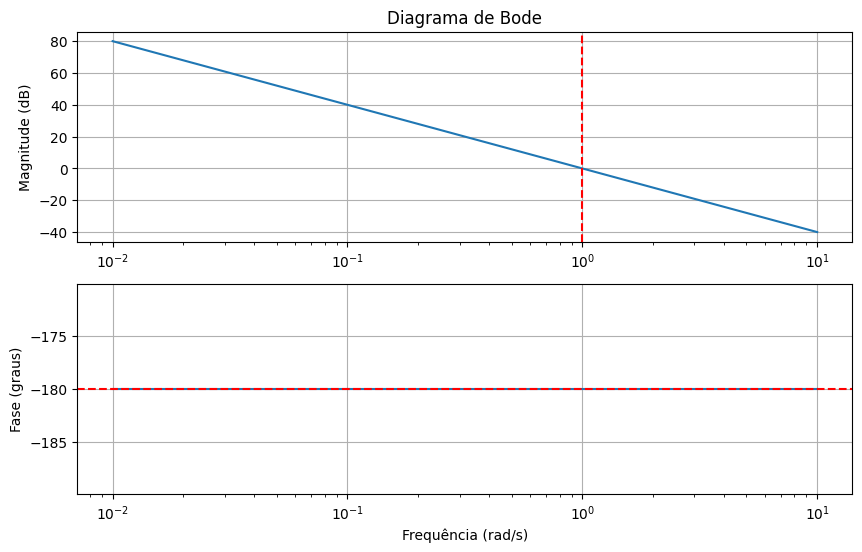

O ganho inicial em dB é: 80.00 dB
The phase is -180 degrees at a frequency of 0.01 rad/s
The gain at that frequency is 80.00 dB
Frequência de cruzamento: 1.00 rad/s
Margem de fase: 0.00 graus
Margem de ganho: -80.00 dB


In [ ]:
!pip install control
!pip install matplotlib
!pip install scipy
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from control import tf, bode



# Definindo a função de transferência
num = [1]
den = [0, 1, 0, 0]
sys = signal.TransferFunction(num, den)
sys2 = signal.lti(num, den)

# Gerando o diagrama de Bode
w, mag, phase = signal.bode(sys)

# Encontrando a frequência de cruzamento (aproximada)
# (Assumindo que a frequência de cruzamento está dentro da faixa de w)
idx = np.argmin(np.abs(mag))
freq_cruzamento = w[idx]

# Plotando o diagrama de Bode com as linhas
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.axvline(x=freq_cruzamento, color='red', linestyle='--')
plt.ylabel('Magnitude (dB)')
plt.title('Diagrama de Bode')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.axhline(y=-180, color='red', linestyle='--')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')
plt.grid(True)
plt.show()

# Calculando o ganho inicial em dB
ganho_inicial_db = mag[0]

# Convertendo para ganho linear
ganho_inicial_linear = 10**(ganho_inicial_db/20)

print(f"O ganho inicial em dB é: {ganho_inicial_db:.2f} dB")

# Find the index where the phase is closest to -180 degrees
phase_index = np.argmin(np.abs(phase + 180))

# Get the frequency and gain at that index
freq_180 = w[phase_index]
gain_180 = mag[phase_index]

print(f"The phase is -180 degrees at a frequency of {freq_180:.2f} rad/s")
print(f"The gain at that frequency is {gain_180:.2f} dB")

# Encontrando a frequência de cruzamento (aproximada)
idx = np.argmin(np.abs(mag))
freq_cruzamento = w[idx]

# Calculando a margem de fase
margem_fase = phase[idx] + 180

# Encontrando a frequência onde a fase é -180 graus (aproximada)
idx_180 = np.argmin(np.abs(phase + 180))
freq_180 = w[idx_180]

# Calculando a margem de ganho
margem_ganho = mag[idx] - mag[idx_180]

print(f"Frequência de cruzamento: {freq_cruzamento:.2f} rad/s")
print(f"Margem de fase: {margem_fase:.2f} graus")
print(f"Margem de ganho: {margem_ganho:.2f} dB")

Frequência de corte =  1000.0  rad/sec
Ganho na Freq. de Corte =  1.9978760755631971e-13


<Figure size 640x480 with 0 Axes>

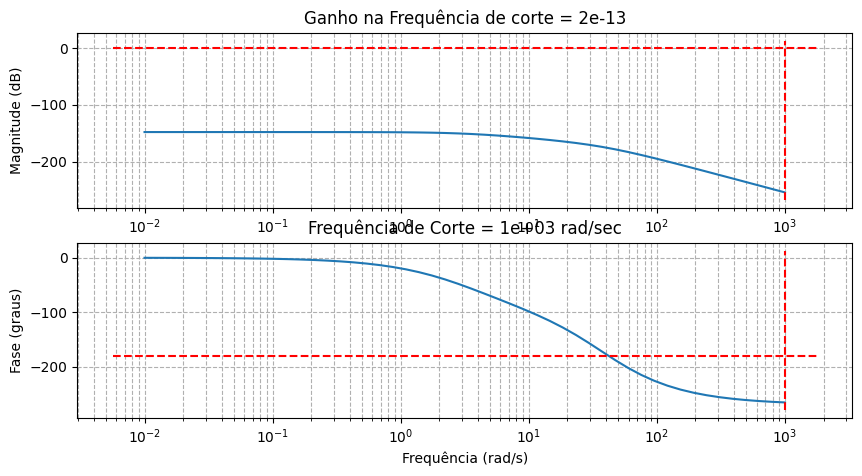

In [ ]:
%matplotlib inline
!pip install control
!pip install matplotlib
!pip install numpy

import control
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Definindo a função de transferência
num = [1/5000]
den = [1, 75, 1750, 5000]

sys = control.tf(num,den)

w = np.logspace(-2,3)

mag,phase,omega = control.bode(sys,w, plot = False);
plt.tight_layout()

# find the cross-over frequency and gain at cross-over
wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
Kcu = np.interp(wc,omega,mag)

print('Frequência de corte = ', wc, ' rad/sec')
print('Ganho na Freq. de Corte = ', Kcu)

# Plot separado para magnitude
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.semilogx(omega, 20 * np.log10(mag))  # Converte a magnitude para dB
plt.title('Diagrama de Bode')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which="both", ls="--")

# Plot separado para fase
plt.subplot(2, 1, 2)
plt.semilogx(omega, phase * (180 / np.pi))  # Converte a fase para graus
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')
plt.grid(True, which="both", ls="--")

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[Kcu,Kcu],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Ganho na Frequência de corte = {0:.3g}".format(Kcu))

plt.sca(ax2)                 # phase plot
plt.plot(plt.xlim(),[-180,-180],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Frequência de Corte = {0:.3g} rad/sec".format(wc))
plt.show()

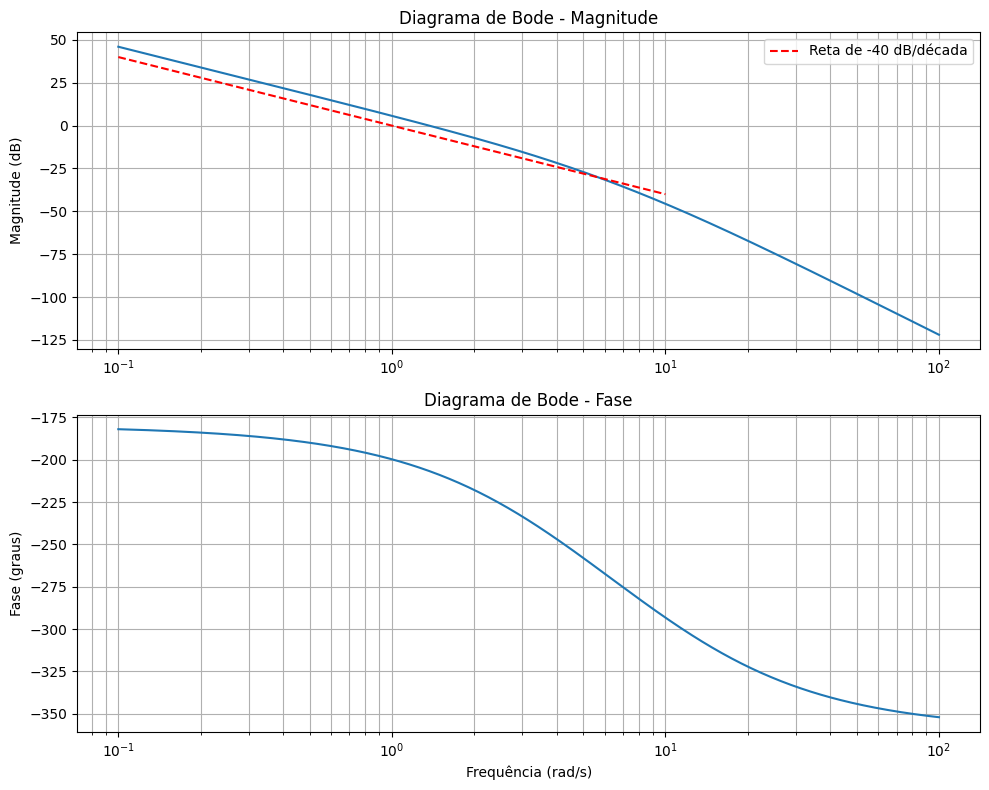

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definindo um sistema tipo 2: G(s) = K / (s^2)
# Vamos definir um valor para K para visualização adequada
K = 80
num = [K]
den = [1, 14, 40, 0, 0]  # Isso representa s^2 no denominador

# Criando a função de transferência do sistema tipo 2
sistema = ctrl.TransferFunction(num, den)

# Plotando o diagrama de Bode
mag, phase, omega = ctrl.bode_plot(sistema, dB=True, Hz=False, omega_limits=(1e-1, 1e2), omega_num=500, plot=False)

# Plotando os gráficos de magnitude e fase
fig, (ax_mag, ax_phase) = plt.subplots(2, 1, figsize=(10, 8))
ax_mag.semilogx(omega, 20 * np.log10(mag))
ax_mag.set_title("Diagrama de Bode - Magnitude")
ax_mag.set_ylabel("Magnitude (dB)")
ax_mag.grid(True, which="both")

ax_phase.semilogx(omega, phase * 180 / np.pi)
ax_phase.set_title("Diagrama de Bode - Fase")
ax_phase.set_ylabel("Fase (graus)")
ax_phase.set_xlabel("Frequência (rad/s)")
ax_phase.grid(True, which="both")

# Adicionando a reta de 40 dB/década
# Define a inclinação da reta em 40 dB/década
wc_guess = 1  # Frequência inicial onde a reta começa
x_reta = np.array([1e-1, 1e1])
y_reta = -40 * np.log10(x_reta / wc_guess)
ax_mag.plot(x_reta, y_reta, 'r--', label="Reta de -40 dB/década")
ax_mag.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


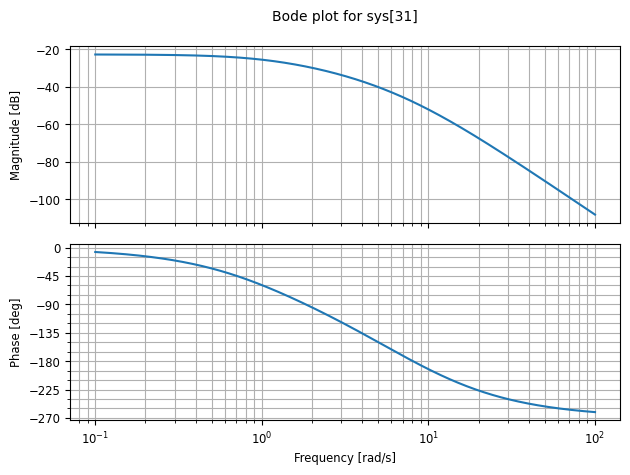

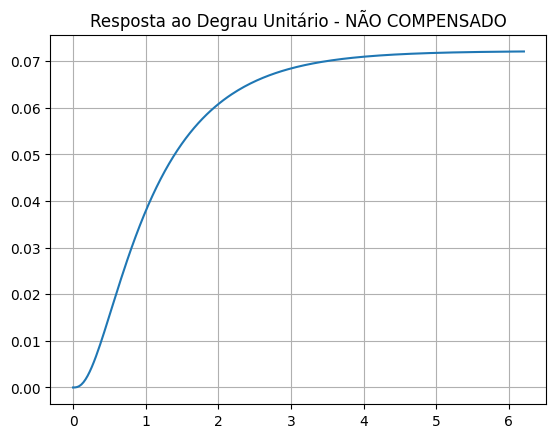

In [9]:
!pip install control
!pip install matplotlib
import numpy as np
from control import tf, feedback, margin, bode_plot, step_response
import matplotlib.pyplot as plt

# Definindo a função de transferência
numerador = [0.0778]  # Numerador da função de transferência
denominador = [1, 1]  # Primeiro termo do denominador
denominador = np.convolve(denominador, [1/5, 1])  # Segundo termo do denominador
denominador = np.convolve(denominador, [1/10, 1])  # Terceiro termo do denominador
G = tf(numerador, denominador)

# Criando a função de transferência em malha fechada com realimentação unitária
FTMF = feedback(G, 1)

# Diagrama de Bode e cálculo da margem de fase
plt.figure()
mag, phase, omega = bode_plot(FTMF, dB=True, deg=True, plot=True)  # Plota o diagrama de Bode
gain_margin, phase_margin, gain_cross_freq, phase_cross_freq = margin(FTMF)  # Calcula as margens

# Resposta ao degrau unitário
plt.figure()
time, response = step_response(FTMF)  # Calcula a resposta ao degrau unitário
plt.plot(time, response)
plt.title('Resposta ao Degrau Unitário - NÃO COMPENSADO')
plt.grid(True)
plt.show()
